In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Introducción al Hub de Hugging Face

## Instalación de [transformers](https://github.com/huggingface/transformers/blob/main/README_es.md) e importar [pipeline](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines)


In [3]:
# !pip install transformers
# !pip install timm

In [7]:
from transformers import pipeline
import timm

## Imágenes


Carga una imagen, por ejemplo de un banano (plátano), a tu folder local. La vamos a clasificar.


In [5]:
clasificacion_imagenes = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\mike\Documents\datos\transfer_learning_hf\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate

![Platano Montaje](../data/platano-montaje.jpg)


In [6]:
clasificacion_imagenes("../data/platano-montaje.jpg")

[{'label': 'banana', 'score': 0.9952404499053955},
 {'label': 'orange', 'score': 0.0011304492363706231},
 {'label': 'lemon', 'score': 0.0007058424525894225},
 {'label': 'pineapple, ananas', 'score': 0.0003670216246973723},
 {'label': 'strawberry', 'score': 0.00021369967726059258}]

In [8]:
segmentacion_imagenes = pipeline(task="image-segmentation")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\mike\Documents\datos\transfer_learning_hf\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike\.cache\huggingface\hub\models--facebook--detr-resnet-50-panoptic. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order 

![Grupo de personas](../data/personas.png)


In [9]:
segmentacion_imagenes("../data/personas.png")

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.990203,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.997341,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.997849,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.997112,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.999223,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.95933,
  'label': 'LABEL_199',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.998542,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.999214,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>},
 {'score': 0.999146,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=920x743>}]

## Texto


In [10]:
summarization = pipeline(task="summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\mike\Documents\datos\transfer_learning_hf\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see ac

In [11]:
texto = """

Brazil has a strong track record of free, fair and transparent elections and the United Sates trusts that its electoral system will reflect the will of the people in the October election, a U.S. State Department spokesperson said on Tuesday.

The endorsement came one day after Brazilian President Jair Bolsonaro questioned the country's electronic voting system in a briefing to foreign diplomats.

Bolsonaro told some 40 members of the diplomatic corps in Brasilia that the voting system was vulnerable to fraud, an allegation he has repeatedly made to cast doubt on the October election in which he will seek re-election. "
"""

In [13]:
len(texto)

629

Resumen del texto


In [14]:
summarization(texto, min_length=30, max_length=120)

[{'summary_text': " Brazil has a strong track record of free, fair and transparent elections, the U.S. State Department says . The endorsement came one day after Brazilian President Jair Bolsonaro questioned the country's electronic voting system in a briefing to foreign diplomats ."}]

¿Qué pasa si queremos usar un modelo en especial? Por ejemplo, uno en español.

Solo tenemos que colocar el modelo que queremos utilizar cuando llamemos `pipeline`:


In [15]:
summarization_es = pipeline(
    task="summarization", model="josmunpen/mt5-small-spanish-summarization"
)

c:\Users\mike\Documents\datos\transfer_learning_hf\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike\.cache\huggingface\hub\models--josmunpen--mt5-small-spanish-summarization. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
texto_es = """

Las personas con orientaciones sexuales y de género diversas históricamente han sido una población excluida de la participación política electoral en Colombia. Sin embargo, durante los últimos veinte años la consolidación del movimiento LGBTIQ+, que hoy tiene un gran potencial de movilización y organización, ha llevado a la conquista de espacios donde antes solo eran posibles estando “enclosetados”. (Así se vivió la marcha del Orgullo LGBTIQ+ 2022 | La Disidencia)

Las elecciones legislativas del 13 de marzo de 2022 fueron un hito para la población diversa. Por un lado, hubo 26 candidaturas abiertamente LGBTIQ+, que representan un aumento del 85,7 % de participación en comparación a las catorce del 2018. Esto llevó a que, por primera vez, estas personas vayan a ocupar siete curules en el Congreso: una senadora y seis representantes a la Cámara.

Angélica Lozano (Alianza Verde) repite su curul del Senado. Las otras seis personas son Susana Boreal (Pacto Histórico), quien ganó un escaño en la Cámara de Representantes por Antioquia; María del Mar Pizarro (Pacto Histórico), en la Cámara por Bogotá; Andrés Cancimance (Pacto Histórico), quien llegará a la Cámara por Putumayo; Carolina Giraldo (Alianza Verde) y Alejandro García (Alianza Verde y Polo), por Risaralda, y Tamara Argote (Pacto Histórico), quien es la primera persona no binaria en llegar al Congreso de la República, estará en la Cámara por Bogotá.

Este Congreso 2022-2026, que se posiciona como el más diverso en la historia del país, representa una ampliación del espectro democrático. Alejandro García, representante a la Cámara por Risaralda, lo celebra, pero resalta que “todavía faltan identidades en este espacio de representación y se tiene que velar por construir espacios seguros para pensarnos la diversidad y cuestionarnos cómo integrarla a nuestras vidas desde el ejercicio de la ciudadanía”.

Más allá de ganar visibilidad, esta nueva corporación tiene una responsabilidad de hacer control político a promesas que llevan años esperando a ser resueltas, como, por ejemplo, la Política Pública Nacional LGBTIQ+. También, abre la posibilidad para tramitar leyes que respondan a la lucha de las diversidades sexuales y de género, así como de feministas, movimientos étnicos, ambientalistas y otros grupos poblaciones tradicionalmente excluidos.
"""

In [18]:
len(texto_es)

2334

In [21]:
summarization_es(texto_es, min_length=50, max_length=200)

[{'summary_text': 'la nueva lucha de las diversidades sexuales y de género encolombia vuelve a conquistar espacios seguros para crear espacios seguros para pensar en la diversidad electoral encolombia'}]

## Clasificacion Texto


In [25]:
sentimientos_pipeline = pipeline(
    task="text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

c:\Users\mike\Documents\datos\transfer_learning_hf\venv\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at cardiffnlp/twitter-ro

In [27]:
texto_sentimientos = [
    "¡Me encanta poder aprender en español con Platzi y Hugging Face",
    "Me enoja no tener más material de Hugging Face en español.",
    "Me da igual que no haya más material de Hugging Face en español.",
]

In [28]:
sentimientos_pipeline(texto_sentimientos)

[{'label': 'neutral', 'score': 0.6682083010673523},
 {'label': 'neutral', 'score': 0.8228063583374023},
 {'label': 'neutral', 'score': 0.8492305278778076}]

## Otros muchos

En el Hub de Hugging Face no solo hay modelos de imágenes y texto. Puedes encontrar de audio, apredizaje por refuerzo, para videos y más.

Si quieres usarlos con pipeline revisa la documentación de transformers:

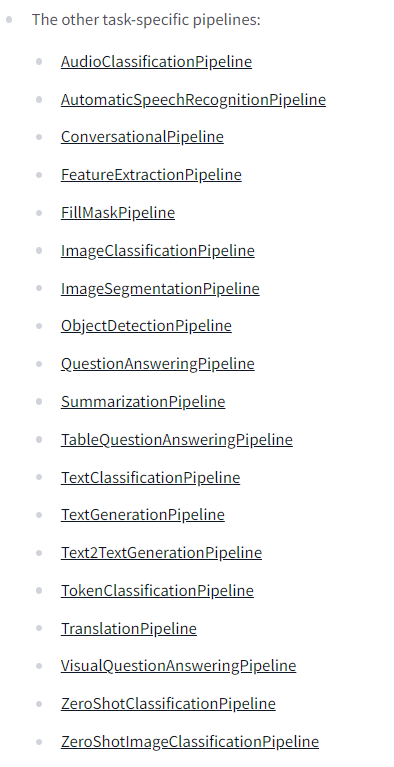
